### import Dependecies

In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Load Dataset

In [35]:
df=pd.read_csv("../data/processed/ChurnModelling_Missing_values_Handled.csv")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [36]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
numerical_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
categorical_cols =['Geography','Gender','HasCrCard','IsActiveMember','NumOfProducts']

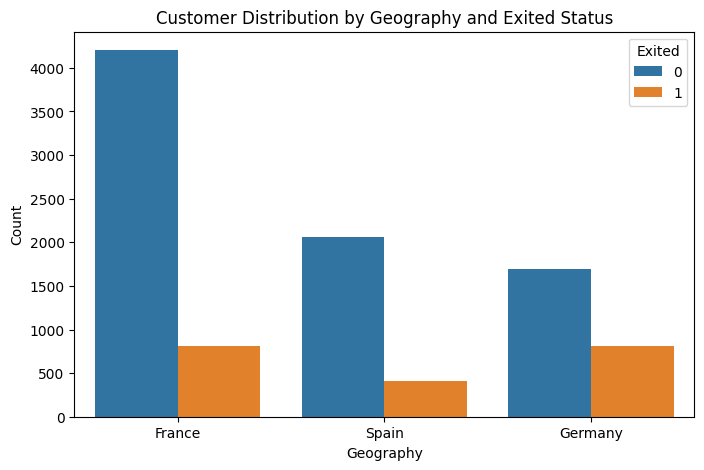

In [38]:
#basic EDA of geograph with Existed column
plt.figure(figsize=(8,5))
sns.countplot(x='Geography', hue='Exited', data=df) 
plt.title('Customer Distribution by Geography and Exited Status')
plt.xlabel('Geography') 
plt.ylabel('Count')
plt.show()

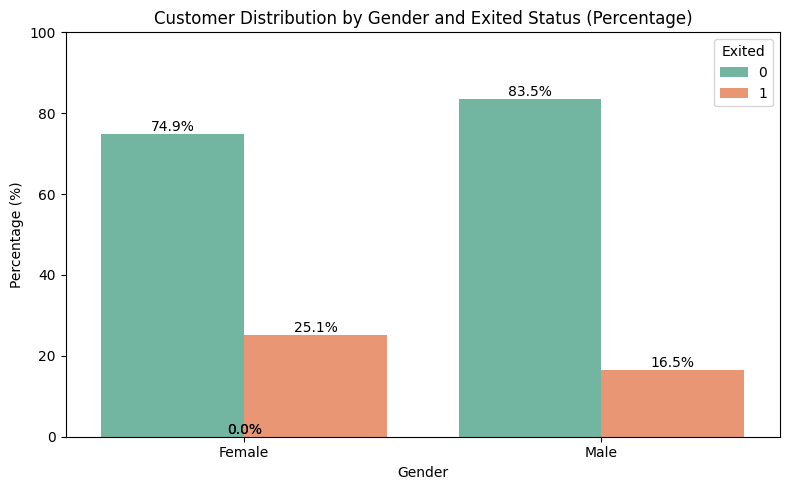

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate percentage of Exited per Gender
gender_percent = (
    df.groupby('Gender')['Exited']
      .value_counts(normalize=True)   # proportion per Gender
      .mul(100)                       # convert to percentage
      .reset_index(name='Percentage')
)

# Step 2: Plot percentage-wise bars
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x='Gender',
    y='Percentage',
    hue='Exited',
    data=gender_percent,
    palette='Set2'
)

# Step 3: Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',
        (p.get_x() + p.get_width()/2, height),
        ha='center',
        va='bottom'
    )

# Step 4: Titles and labels
plt.title('Customer Distribution by Gender and Exited Status (Percentage)')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend(title='Exited')
plt.tight_layout()
plt.show()


Here We Can Clearly see that On More Females are Churn than Males

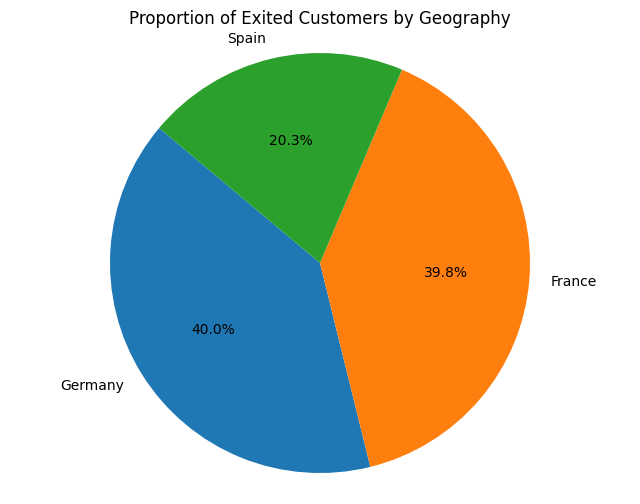

In [40]:
#Total Exited=1 Count by Geography by piechart with clearly percentage
exited_counts = df[df['Exited'] == 1]['Geography'].value_counts()   
plt.figure(figsize=(8, 6))
plt.pie(exited_counts, labels=exited_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Exited Customers by Geography')
plt.axis('equal')
plt.show()  

As a Percentage more Citizens of Germany and France than Spain.it is 2x that Spain are exited

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


Text(0, 0.5, 'Count')

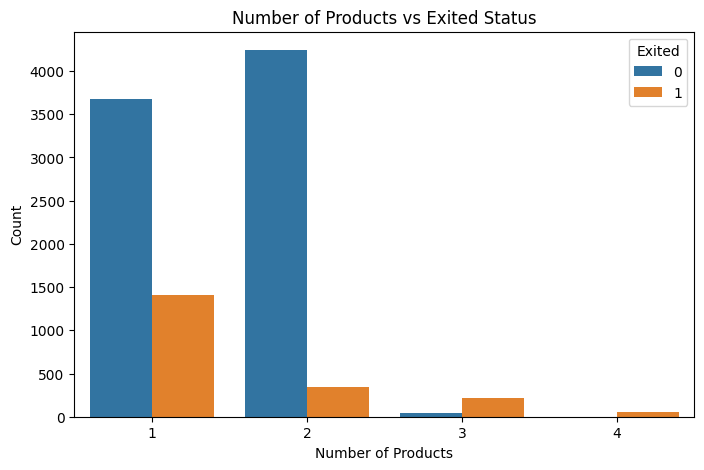

In [43]:
#NumOfProducts vs Exited
plt.figure(figsize=(8,5))   
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Number of Products vs Exited Status')
plt.xlabel('Number of Products')
plt.ylabel('Count')

We Can See that More you Interact with Bank (with Products like Loans,Credit Cards etc),less likely you are to leave the Bank.as a Banker We should give more attention to how interact with customers with giving More Products 


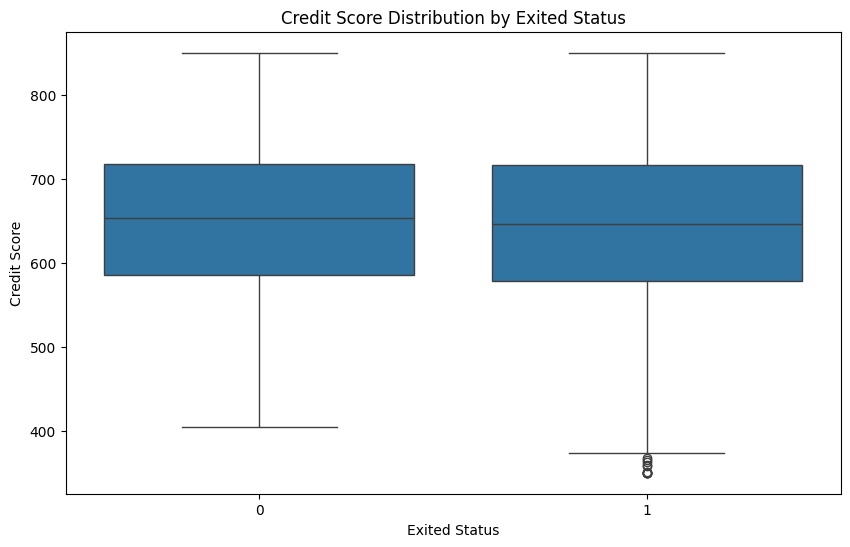

In [44]:
#CreditScore vs Exited
plt.figure(figsize=(10,6))  
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score Distribution by Exited Status')
plt.xlabel('Exited Status')
plt.ylabel('Credit Score')
plt.show()

#genaraly all the customers churn vs non churn has same range of CreditScores
but as creditcard score Outliers (below the Range) is more like to be Churn (exited)


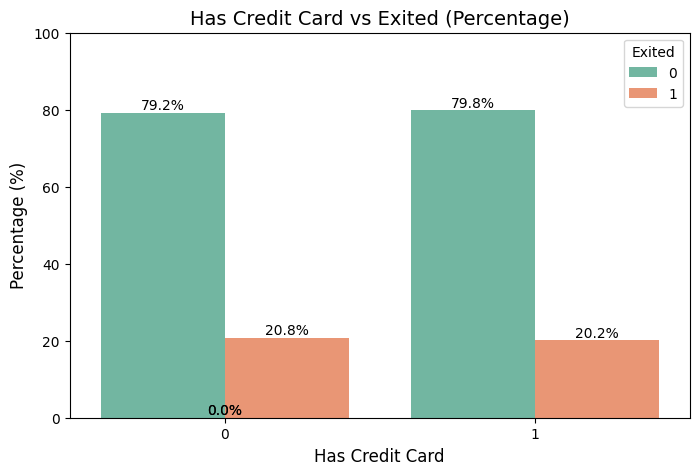

In [48]:

percent_df = (
    df.groupby('HasCrCard')['Exited']
      .value_counts(normalize=True)  # get proportion
      .mul(100)                       # convert to percentage
      .reset_index(name='Percentage')
)

# Step 2: Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x='HasCrCard',
    y='Percentage',
    hue='Exited',
    data=percent_df,
    palette='Set2'
)

# Step 3: Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',  # show 1 decimal percentage
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom'
    )

# Step 4: Titles and labels
plt.title('Has Credit Card vs Exited (Percentage)', fontsize=14)
plt.xlabel('Has Credit Card', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)  # since percentage
plt.legend(title='Exited', loc='upper right')
plt.show()


we can clearly see that not much difference in Exited and HasCreditCard 

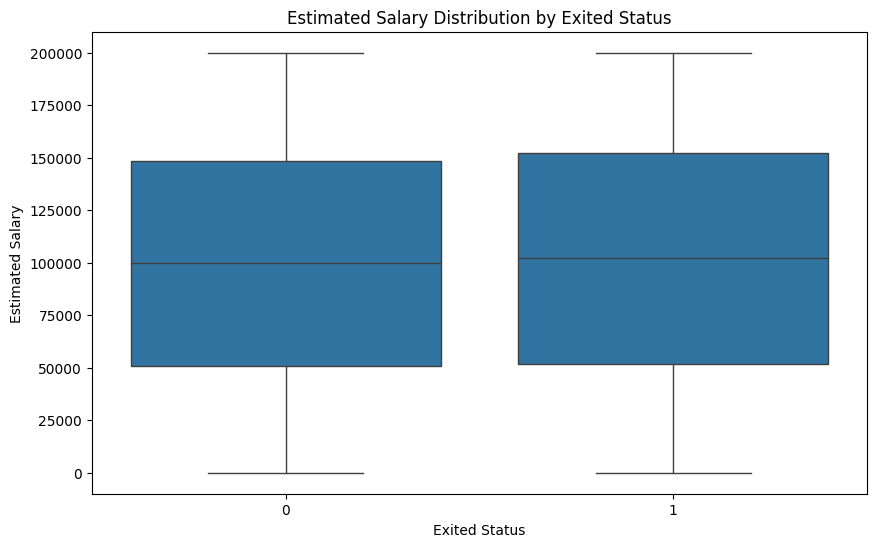

In [49]:
#EstimatedSalary vs Exited
plt.figure(figsize=(10,6))  
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary Distribution by Exited Status')
plt.xlabel('Exited Status')
plt.ylabel('Estimated Salary')
plt.show()

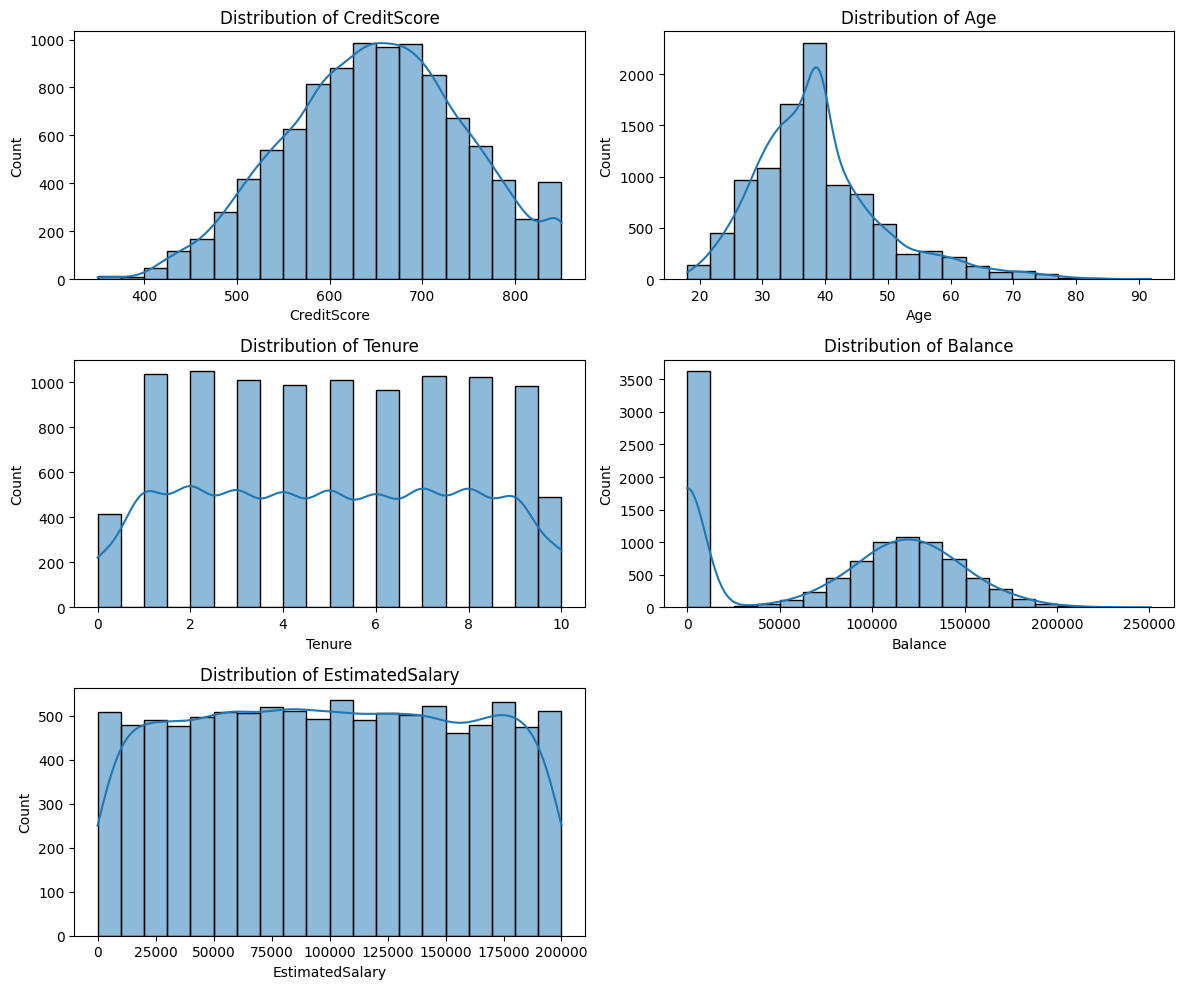

In [57]:
#distribution of numerical features
plt.figure(figsize=(12,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


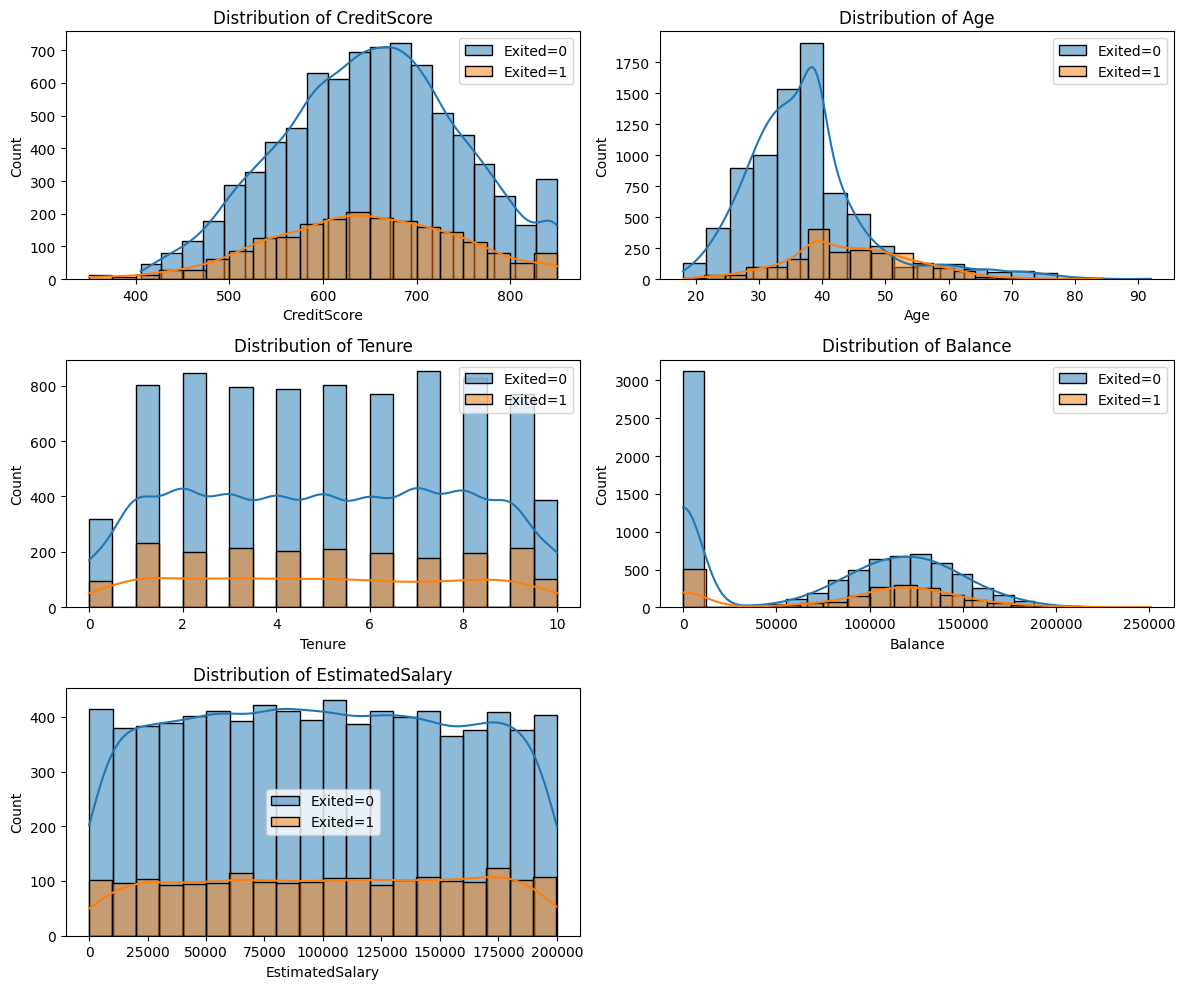

In [59]:
#now I want 2 columns side by side comparison with numerical columns distribution vs exited.left-->exited=0 right-->exited=1

plt.figure(figsize=(12,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[df['Exited']==0][col], kde=True, bins=20, label='Exited=0')
    sns.histplot(df[df['Exited']==1][col], kde=True, bins=20, label='Exited=1')
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_17052\1734028196.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100  # % of churn
C:\Users\Hp\AppData\Local\Temp\ipykernel_17052\1734028196.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Churn_Percentage', data=age_churn, palette='Set2')


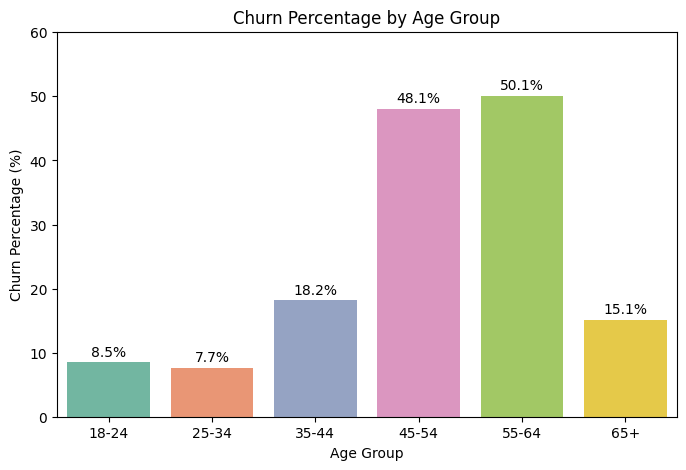

In [61]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is df and has 'Age' and 'Exited' columns
# Example: df = pd.read_csv('your_dataset.csv')

# Step 1: Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]  # customize based on your data
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate churn percentage per age group
age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100  # % of churn
age_churn = age_churn.reset_index(name='Churn_Percentage')

# Step 3: Plot churn percentage by age group
plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='Churn_Percentage', data=age_churn, palette='Set2')
plt.title('Churn Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Percentage (%)')

# Step 4: Annotate bars with percentage labels
for i, row in age_churn.iterrows():
    plt.text(i, row['Churn_Percentage'] + 1, f"{row['Churn_Percentage']:.1f}%", ha='center')

plt.ylim(0, age_churn['Churn_Percentage'].max() + 10)
plt.show()


Here We Can Clearly See that Middle age People More Like to be CHurn than Younger peoples